# Report VIII

## Identifying and removing outliers

In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [35]:
dados = pd.read_csv('data/aluguel_tratado.csv', sep = ';')

<AxesSubplot:>

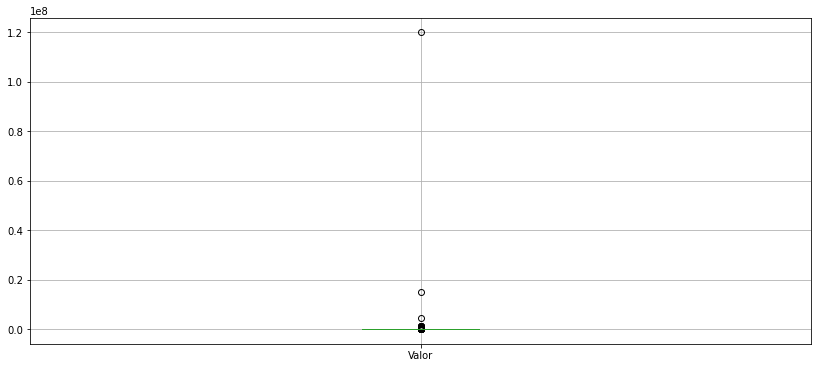

In [36]:
dados.boxplot(['Valor'])

In [37]:
dados[dados.Valor >= 500000].head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
810,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,0.0,0.0
866,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0
1142,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0
2666,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0
2931,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0
4499,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,0.0,1000.0
4532,Prédio Inteiro,Centro,0,0,0,6986,560000.0,0.0,0.0
5448,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,0.0
5474,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,0.0,10000.0
7889,Prédio Inteiro,Centro,0,90,0,7774,505310.0,0.0,0.0


In [38]:
valor = dados.Valor

<img src='compressed_box-plot.png' width=70%>

In [39]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [40]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

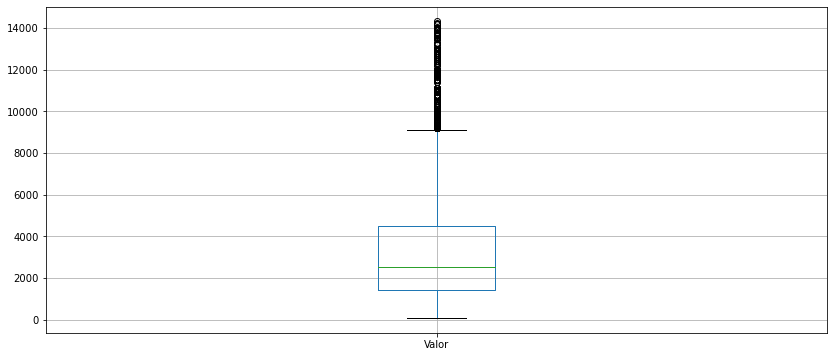

In [41]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

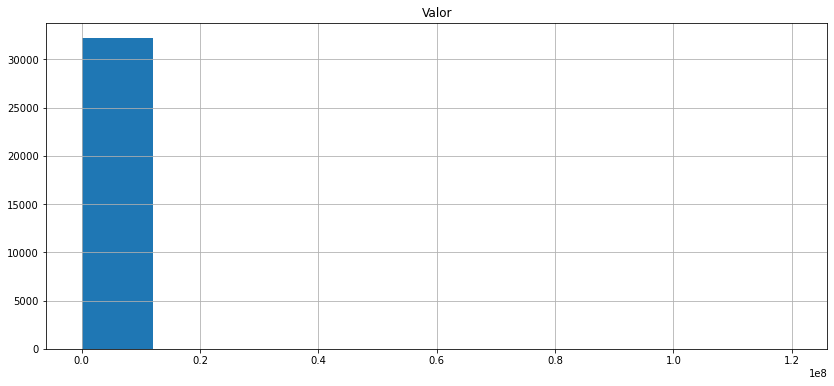

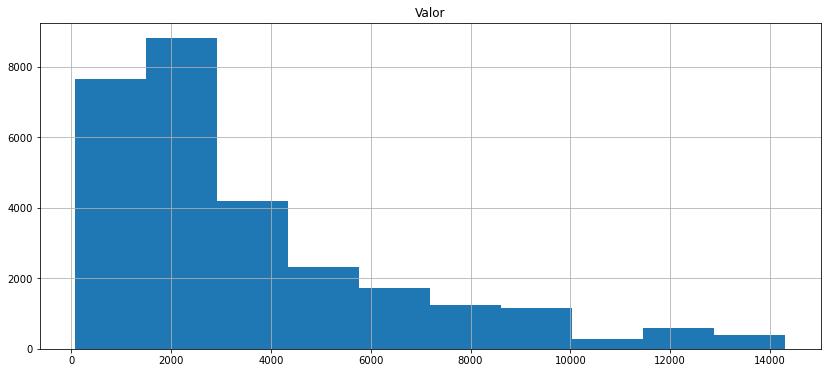

In [42]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Continue

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

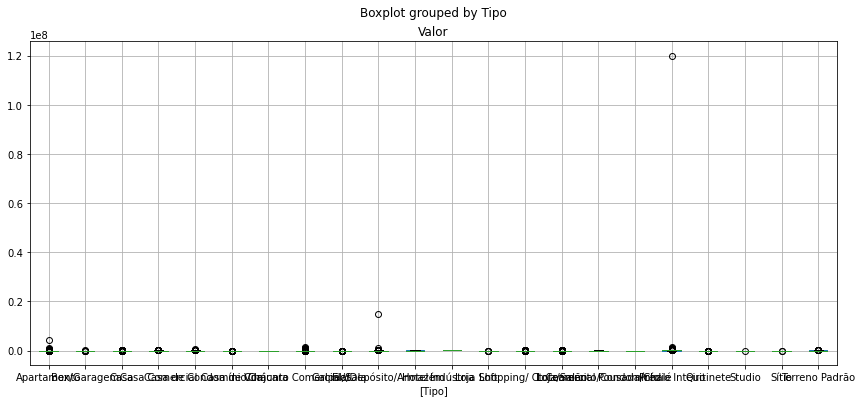

In [43]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [47]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [48]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [49]:
grupo_tipo.groups

{'Apartamento': [3, 4, 5, 9, 10, 11, 13, 17, 18, 19, 21, 22, 25, 26, 28, 30, 31, 32, 34, 35, 38, 39, 41, 42, 45, 46, 47, 48, 49, 52, 53, 54, 55, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 73, 74, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 101, 103, 104, 106, 108, 110, 114, 115, 117, 118, 120, 121, 122, 127, 128, 129, 130, 131, 133, 135, 136, 137, 143, 144, 148, 149, 150, 154, 156, 158, 159, 160, 161, 162, 165, 168, 172, 174, 175, 177, ...], 'Box/Garagem': [201, 363, 568, 867, 993, 1606, 1633, 1815, 1908, 2453, 3020, 3398, 3513, 3531, 3706, 3782, 3882, 3922, 4188, 5759, 5990, 6625, 7017, 7285, 7758, 9034, 9103, 9121, 9508, 10071, 10230, 11225, 11782, 11843, 11950, 12470, 12490, 12947, 13570, 13651, 14763, 15264, 15889, 16133, 17012, 17226, 17675, 18350, 18671, 19138, 19584, 19828, 20326, 20776, 20858, 21190, 21829, 21841, 22042, 23410, 23906, 24230, 24496, 24628, 24802, 25046, 25734, 26135, 26204, 27029, 28012, 28028, 28029, 28262, 28760, 29379, 29561, 30150, 30454, 30914,

In [50]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [53]:
print(Q1)
print(Q3)
print(IIQ.round(2))
print(limite_inferior.round(2))
print(limite_superior)

Tipo
Apartamento                      1700.0
Box/Garagem                       250.0
Casa                             1100.0
Casa Comercial                   6000.0
Casa de Condomínio               4000.0
Casa de Vila                      750.0
Chácara                          4900.0
Conjunto Comercial/Sala          1000.0
Flat                             2500.0
Galpão/Depósito/Armazém          7000.0
Hotel                           18500.0
Indústria                      120000.0
Loft                             1750.0
Loja Shopping/ Ct Comercial      1500.0
Loja/Salão                       2200.0
Loteamento/Condomínio           14000.0
Pousada/Chalé                    1480.0
Prédio Inteiro                  14900.0
Quitinete                         900.0
Studio                           1500.0
Sítio                            9750.0
Terreno Padrão                   8000.0
Name: Valor, dtype: float64
Tipo
Apartamento                      5000.0
Box/Garagem                       450.0
Ca

In [54]:
limite_superior['Casa']

22850.0

<img src='compressed_box-plot.png' width=70%>

In [58]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados.Tipo == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])
    

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

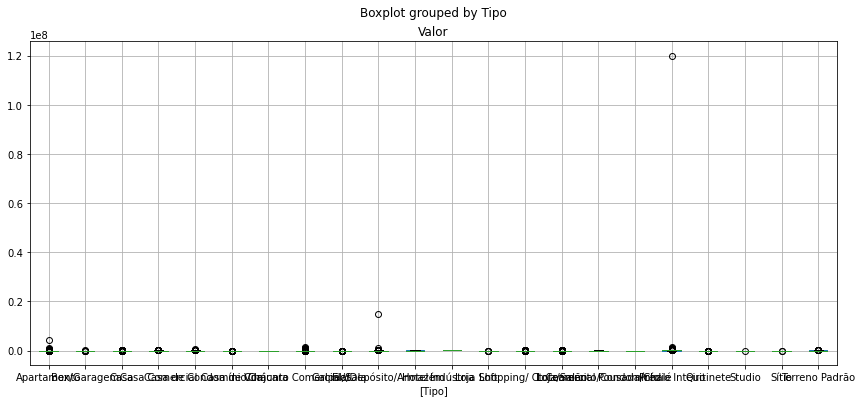

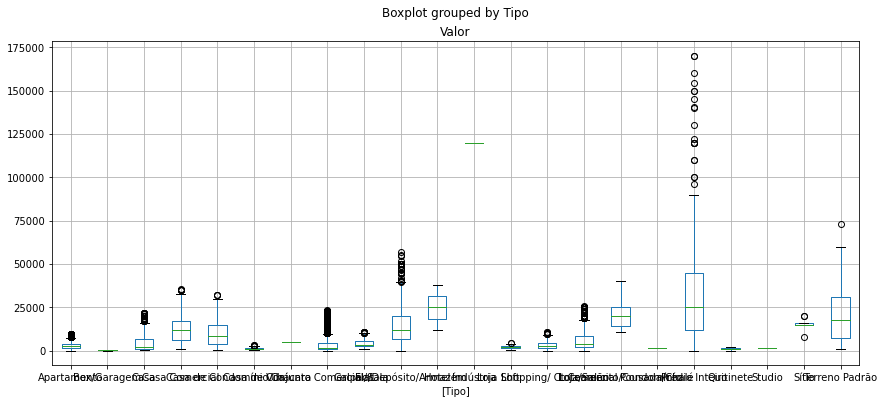

In [60]:
dados.boxplot(['Valor'], by = ['Tipo'])
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [62]:
dados_new.to_csv('data/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)